<a href="https://colab.research.google.com/github/adin786/hands-on-ml-book/blob/main/ch4/ch4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import numpy.random as rnd
import matplotlib.pyplot as plt
# from sklearn.linear_model import LinearRegression
# from sklearn.linear_model import SGDRegressor
# from sklearn.metrics import mean_squared_error
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import Ridge
# from sklearn.linear_model import Lasso


# Linear Regression
Set up some sample data for X and y vector, m = 100 and n=1

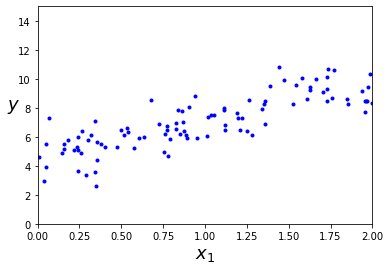

In [9]:
X = 2 * np.random.rand(100,1)
y = 4 + 3 * X + np.random.randn(100,1)

# Visualise the X and y data
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.show()

## Normal equation
Solve the normal equation Using *np.linalg* method

In [26]:
# Solve normal equation
X_b = np.c_[np.ones((100, 1)), X]  # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

# Print the model params (theta)
print(f'Model params are theta0={theta_best[0]}, theta1={theta_best[1]}')

Model params are theta0=[4.5477566], theta1=[2.55559168]


Make a prediction using the solved params theta0 and theta1

In [28]:
# Create input vector X at X=0 and X=2 so we can draw a prediction line later
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]  # add x0 = 1 to each instance

# Compute prediction
y_predict = X_new_b.dot(theta_best)
print(f'Predicted vales (@X=0) y_predict={y_predict[0]}, and (@X=2) y_predict={y_predict[1]}')

Predicted vales (@X=0) y_predict=[4.5477566], and (@X=2) y_predict=[9.65893996]


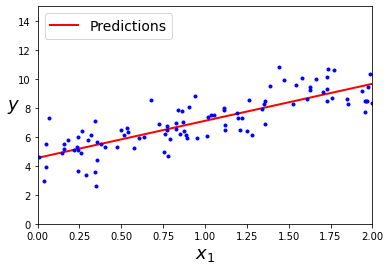

In [20]:
# Plot the prediction line overlaid on the raw data points
plt.plot(X_new, y_predict, "r-", linewidth=2, label="Predictions")
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 2, 0, 15])
plt.show()

### Using built in sklearn method
Attempt the same job using batch gradient descent method (computes over full dataset at each step

In [23]:
from sklearn.linear_model import LinearRegression

In [34]:
# Train the model using sklearn built in class
lin_reg = LinearRegression()
lin_reg.fit(X, y)
print(f'Model params are theta0={lin_reg.intercept_}, theta1={lin_reg.coef_[0]}')

# Predict 
print(f'Predicted vales (@X=0) y_predict={lin_reg.predict(X_new)[0]} and (@X=2) y_predict={lin_reg.predict(X_new)[1]}')

# Book says sklearn LinearRegression is based on np.linalg.lstsq function

Model params are theta0=[4.5477566], theta1=[2.55559168]
Predicted vales (@X=0) y_predict=[4.5477566] and (@X=2) y_predict=[9.65893996]


End up with basically the same result

Something about the np.linalg.lstsq function computing the pseudoinverse of X.

Can use the np.linalg.pinv function to caclulate the pseudoinverse directly.

This is calculated using a standard matrix factorization technique called SVD **(singular value decomposition)**. It does this by setting all near-zero values in the matrix to zero, replaces them with their inverse, and transposes this.

This approach is more efficient and robust than computing the Normal equation, X^T.X cannot be inverted if m < n,  The pseudoinverse can always be calculated

### Computational complexity
An argument to use something other than Normal Equation when n is large (number of features).

- **[CON]** Normal equation computes inverse of a matrix, complexity is typically O(n^2.4) to O(n^3). SVD pseudoinverse method has complexity O(n^2)

- **[PRO]** Both are linear with regard to number of instances in training set, so scale well with training set size. Complexity is basically O(m).  But inefficient for large numbers of features.

- **[PRO]** Linear Regression predictions are fast, and scale linearly with number of instances, and number of features.


## Batch gradient descent

Solving manually where:

theta_next = theta - (learningRate)*(GradientOfMSE)

In [37]:
# Manually coded batch gradient descent
eta = 0.1 # Learning rate
n_iterations = 1000
m = 100
theta = np.random.randn(2,1) # Initialise theta with random values
print(f'Model params initialised with random values theta0={theta[0]}, theta1={theta[1]}')

# Iteratively solve gradient descent equation
for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

print(f'Model params are theta0={lin_reg.intercept_}, theta1={lin_reg.coef_[0]}')

Model params initialised with random values theta0=[1.06142149], theta1=[0.75430367]
Model params are theta0=[4.5477566], theta1=[2.55559168]


Result looks good, but **what if we changed the learning rate**

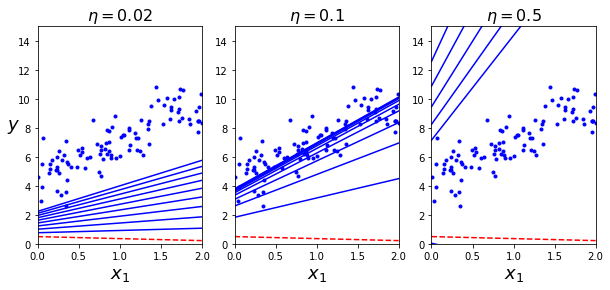

In [41]:
theta_path_bgd = []

def plot_gradient_descent(theta, eta, theta_path=None):
    m = len(X_b)
    plt.plot(X, y, "b.")
    n_iterations = 1000
    for iteration in range(n_iterations):
        if iteration < 10:
            y_predict = X_new_b.dot(theta)
            style = "b-" if iteration > 0 else "r--"
            plt.plot(X_new, y_predict, style)
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradients
        if theta_path is not None:
            theta_path.append(theta)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 2, 0, 15])
    plt.title(r"$\eta = {}$".format(eta), fontsize=16)

np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization

plt.figure(figsize=(10,4))
plt.subplot(131); plot_gradient_descent(theta, eta=0.02)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(132); plot_gradient_descent(theta, eta=0.1, theta_path=theta_path_bgd)
plt.subplot(133); plot_gradient_descent(theta, eta=0.5)
plt.show()

- In middle, learning rate looks good.
- On left, learning erate is too low and takes too long to converge.
- On right, learning rate too high and model *diverges*!

## Stochastic Gradient Descent
Uses a random instance in the training set to compute the gradients only on that instance.  Computationally fast, but less regular.

In [42]:
n_epochs = 50
t0, t1, = 5, 50   # learning schedule

def learning_schedule(t):
  return t0 / (t + t1)

# Initialise random theta start values
theta = np.random.randn(2,1)

for epoch in range(n_epochs):
  for i in range(m): # loop for every training instance
    random_index = np.random.randint(m)  # Select a random instance
    xi = X_b[random_index:random_index+1]
    yi = y[random_index:random_index+1]
    gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
    eta = learning_schedule(epoch*m + i)
    theta = theta - eta * gradients

print(f'Model params are theta0={theta[0]}, theta1={theta[1]}')

Model params are theta0=[4.54751644], theta1=[2.56840546]


That was basically a manually coded version of the sklearn **SGDRegressor** method which follows

In [47]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=1000, tol = 1e-3, penalty = None, eta0=0.1)
sgd_reg.fit(X, y.ravel())

print(f'Model params are theta0={sgd_reg.intercept_}, theta1={sgd_reg.coef_}')


Model params are theta0=[4.58234511], theta1=[2.58298347]


## Mini-batch Gradient Descent
Does the same as stochastic gradient descent, but uses a small random subset of instances in the training data, rather than a single instance. Result is smoother progress.

In [49]:
n_iterations = 50
minibatch_size = 20

np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization

t0, t1 = 200, 1000
def learning_schedule(t):
    return t0 / (t + t1)

t = 0
for epoch in range(n_iterations):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(0, m, minibatch_size):
        t += 1
        xi = X_b_shuffled[i:i+minibatch_size]
        yi = y_shuffled[i:i+minibatch_size]
        gradients = 2/minibatch_size * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(t)
        theta = theta - eta * gradients

print(f'Model params are theta0={theta[0]}, theta1={theta[1]}')


Model params are theta0=[4.58389729], theta1=[2.6109958]


# Polynomial Regression
Generate some sample data again in X, y vectors

In [51]:
import numpy as np
import numpy.random as rnd
import matplotlib.pyplot as plt

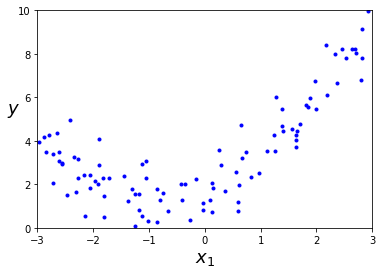

In [52]:
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

# Visualise the data
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.show()

Straight line will never fit this data properly. So we use the sklearn PolynomialFeatures class to add one squared term for every feature of the training set

**transforms an array of *n* features into one of (n+d)!/n!d!**, where d is the degree(?)

In [53]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
print(f'Feature one in training set:{X[0]}')
print(f'Feature one with it\'s squared term added: {X_poly[0]}')

Feature one in training set:[-0.75275929]
Feature one with it's squared term added: [-0.75275929  0.56664654]


Now simply fit a linear regression model to this extended training data

Model is of the form: y=c + m1.X + m2.X^2

Model params are [theta0,theta1,theta2] = [1.78134581 0.93366893 0.56456263]


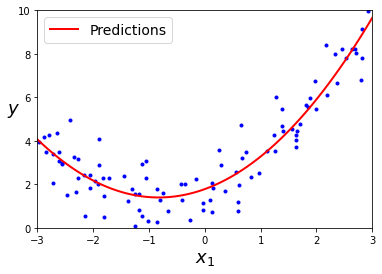

In [64]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
print(f'Model params are [theta0,theta1,theta2] = {np.concatenate((lin_reg.intercept_,lin_reg.coef_[0]))}')

X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])
plt.show()

- So the model estimates y = 0.56x^2 + 0.93x + 1.78
- In reality the data is y = 0.50x^2 + 1.00x + 2.0 + gaussian_noise

# Learning curves / Regularisation


In [65]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

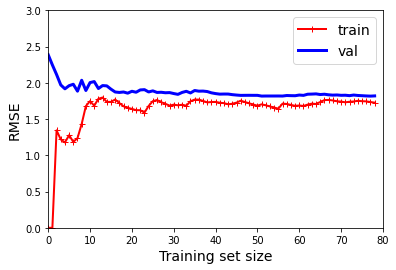

In [66]:
def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))

    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.legend(loc="upper right", fontsize=14)   # not shown in the book
    plt.xlabel("Training set size", fontsize=14) # not shown
    plt.ylabel("RMSE", fontsize=14)              # not shown

lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)
plt.axis([0, 80, 0, 3])                         # not shown in the book
plt.show()       

Above is typical of an underfit model.  Plateaus and doesn't get better with more data.

Let's try a 10th degree polynomial

(0.0, 80.0, 0.0, 3.0)

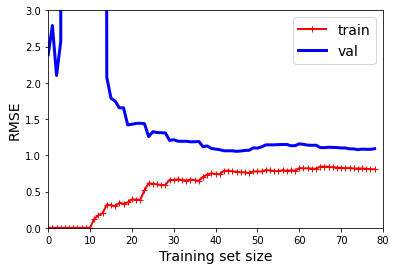

In [68]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
                                  ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
                                  ("lin_reg", LinearRegression()),
])

plot_learning_curves(polynomial_regression, X, y)
plt.axis([0, 80, 0, 3])           # not shown

The above is typical of an overfitting model.  While the error levels are lower this time, as the num samples increases, the validation error and training error do not get close together.

This model won't generalise well

## Ridge Regression
Adds an "L2" loss term

In [70]:
# Generate sample dataset
np.random.seed(42)
m = 20
X = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * X + np.random.randn(m, 1) / 1.5
X_new = np.linspace(0, 3, 100).reshape(100, 1) # for plotting only

Using a closed form method like Normal Equation, but with Ridge Regression loss term included. and using matrix factorisation technique

In [82]:
# Train ridge regression model
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="cholesky")
ridge_reg.fit(X, y)
print(f'[RIDGE] Predicted y value = {ridge_reg.predict([[1.5]])[0]}')

[RIDGE] Predicted y value = [1.55071465]


In [83]:
# Can also try with a Stochastic Grad Descent model
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(penalty="l2")
sgd_reg.fit(X, y.ravel())
print(f'[SGD] Predicted y value = {sgd_reg.predict([[1.5]])}')

[SGD] Predicted y value = [1.46641101]


## Lasso regularisation
Adds an "L1" loss term

In [84]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
print(f'[LASSO] Predicted y value = {lasso_reg.predict([[1.5]])}')

[LASSO] Predicted y value = [1.53788174]


## Elastic-net
Adds both "L1" and "L2" loss terms

In [87]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X, y)
print(f'[Elastic-net] Predicted y value = {elastic_net.predict([[1.5]])}')

[Elastic-net] Predicted y value = [1.54333232]


## Early stopping method

In [90]:
from copy import deepcopy
from sklearn.preprocessing import StandardScaler

# Generate some sample training data
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 2 + X + 0.5 * X**2 + np.random.randn(m, 1)
X_train, X_val, y_train, y_val = train_test_split(X[:50], y[:50].ravel(), test_size=0.5, random_state=10)

poly_scaler = Pipeline([
        ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
        ("std_scaler", StandardScaler())
    ])

X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True,
                       penalty=None, learning_rate="constant", eta0=0.0005, random_state=42)

minimum_val_error = float("inf")
best_epoch = None
best_model = None
for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train)  # continues where it left off
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val, y_val_predict)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = deepcopy(sgd_reg)

Visualise the result

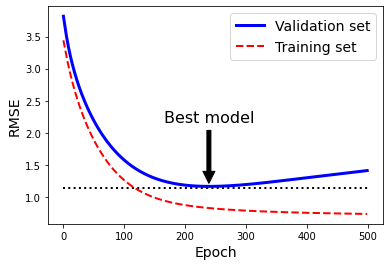

In [92]:
sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True,
                       penalty=None, learning_rate="constant", eta0=0.0005, random_state=42)

n_epochs = 500
train_errors, val_errors = [], []
for epoch in range(n_epochs):
    sgd_reg.fit(X_train_poly_scaled, y_train)
    y_train_predict = sgd_reg.predict(X_train_poly_scaled)
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    train_errors.append(mean_squared_error(y_train, y_train_predict))
    val_errors.append(mean_squared_error(y_val, y_val_predict))

best_epoch = np.argmin(val_errors)
best_val_rmse = np.sqrt(val_errors[best_epoch])

plt.annotate('Best model',
             xy=(best_epoch, best_val_rmse),
             xytext=(best_epoch, best_val_rmse + 1),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=16,
            )

best_val_rmse -= 0.03  # just to make the graph look better
plt.plot([0, n_epochs], [best_val_rmse, best_val_rmse], "k:", linewidth=2)
plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="Validation set")
plt.plot(np.sqrt(train_errors), "r--", linewidth=2, label="Training set")
plt.legend(loc="upper right", fontsize=14)
plt.xlabel("Epoch", fontsize=14)
plt.ylabel("RMSE", fontsize=14)
plt.show()

So the above code just saves a copy of the model using copy.deepcopy() whenever `minimum_val_error` gets bigger than the last value.

# Logistic Regression